Since the data and .csv files are located in the exchange folder, this file can only be executed directly on gpuhub without an error message

In [1]:
# LIBRARIES INSTALLATION
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install pytest-warnings

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached pytest_warnings-0.3.1-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl.metadata (2.6 kB)
Using cached pytest_warnings-0.3.1-py2.py3-none-any.whl (3.7 kB)
Using cached iniconfig-2.0.0-py3-none-any.whl (5.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# LIBRARIES IMPORT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

In [3]:
df = pd.read_csv('/exchange/dspro01/group3/data/train_labels.csv', sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '/exchange/dspro01/group3/data/train_labels.csv'

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
df.dtypes

In [ ]:
df.duplicated().any()

In [ ]:
df.describe()

In [ ]:
for column in df.columns:
    print(f"Verteilung für {column}:")
    print(df[column].value_counts())
    print()

In [ ]:
import matplotlib.pyplot as plt

labels_df = df.drop(columns=['id'])

label_counts = (labels_df == 1).sum()

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')

plt.title('Count of 1s for Each Label', fontsize=14)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count of 1s', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
corr_matrix = labels_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Between Labels')
plt.show()

In [4]:
df_fulldata = pd.read_csv('/exchange/dspro01/group3/data/nacti_metadata.csv', sep=',', low_memory=False)

In [5]:
df_fulldata.describe()

,seq_no,width,height,category_id
count,3.382215e+06,3.382215e+06,3.382215e+06,3.382215e+06
mean,1.691107e+06,2.158737e+03,1.667648e+03,1.413107e+01
std,9.763615e+05,4.479778e+04,4.051848e+04,1.859877e+01
min,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
25%,8.455535e+05,2.048000e+03,1.536000e+03,3.000000e+00
50%,1.691107e+06,2.048000e+03,1.536000e+03,3.000000e+00
75%,2.536660e+06,2.048000e+03,1.536000e+03,1.600000e+01
max,3.382214e+06,2.048205e+07,1.536205e+07,6.900000e+01


In [6]:
df_fulldata.head()

,seq_no,id,filename,study,location,width,height,category_id,name,genus,family,order,class,common_name
0,0,2010_Unit150_Ivan097_img0001.jpg,part0/sub000/2010_Unit150_Ivan097_img0001.jpg,CPW,"San Juan Mntns, Colorado",2048,1536,10,cervus elaphus,cervus,cervidae,artiodactyla,mammalia,red deer
1,1,2010_Unit150_Ivan097_img0002.jpg,part0/sub000/2010_Unit150_Ivan097_img0002.jpg,CPW,"San Juan Mntns, Colorado",2048,1536,10,cervus elaphus,cervus,cervidae,artiodactyla,mammalia,red deer
2,2,2010_Unit150_Ivan097_img0003.jpg,part0/sub000/2010_Unit150_Ivan097_img0003.jpg,CPW,"San Juan Mntns, Colorado",2048,1536,10,cervus elaphus,cervus,cervidae,artiodactyla,mammalia,red deer
3,3,2010_Unit150_Ivan097_img0004.jpg,part0/sub000/2010_Unit150_Ivan097_img0004.jpg,CPW,"San Juan Mntns, Colorado",2048,1536,10,cervus elaphus,cervus,cervidae,artiodactyla,mammalia,red deer
4,4,2010_Unit150_Ivan097_img0005.jpg,part0/sub000/2010_Unit150_Ivan097_img0005.jpg,CPW,"San Juan Mntns, Colorado",2048,1536,10,cervus elaphus,cervus,cervidae,artiodactyla,mammalia,red deer


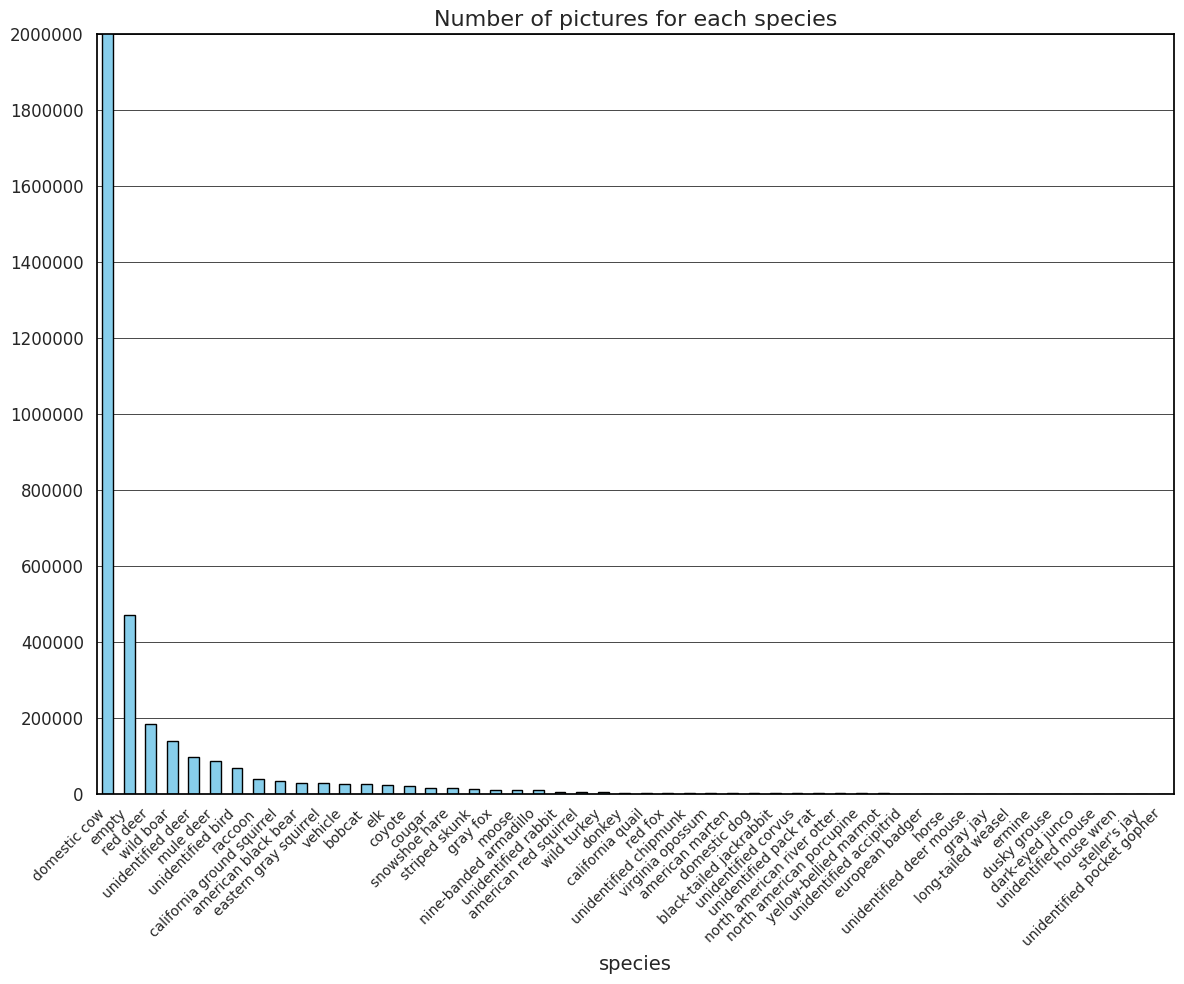

<Figure size 640x480 with 0 Axes>

In [15]:

# Häufigkeiten der Arten zählen
species_counts = df_fulldata['common_name'].value_counts()

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 10))  # Breite 12, Höhe 10
species_counts.plot(kind='bar', color='skyblue', ax=ax, edgecolor='black')

# Hintergrund entfernen
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Achsenlinien auf schwarz setzen
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Gridlines (Rasterlinien) auf schwarz setzen
ax.grid(True, color='black', linestyle='-', linewidth=0.5, axis='y')

# Y-Achse mit Mindestwert und zusätzlichem Platz
max_value = 2000000 #species_counts.max()
ax.set_ylim(0, max_value) 

# Plot anpassen
plt.title('Number of pictures for each species', fontsize=16)
plt.xlabel('species', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Dynamische Y-Ticks
y_ticks = np.linspace(0, max_value, 11)  # 10 gleichmäßige Labels
plt.yticks(y_ticks, [int(y) for y in y_ticks], fontsize=12)

plt.tight_layout()

# Plot anzeigen
plt.show()

plt.savefig('plot_full-dataset.svg', dpi=600, bbox_inches='tight', transparent=True)


In [ ]:

# Häufigkeiten der Arten zählen
species_counts = df_fulldata['common_name'].value_counts()

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 10))  # Breite 12, Höhe 10
species_counts.plot(kind='bar', color='skyblue', ax=ax, edgecolor='black')

# Hintergrund entfernen
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Achsenlinien auf schwarz setzen
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Gridlines (Rasterlinien) auf schwarz setzen
ax.grid(True, color='black', linestyle='-', linewidth=0.5, axis='y')

# Y-Achse mit Mindestwert und zusätzlichem Platz
max_value = 2000000 #species_counts.max()
ax.set_ylim(0, max_value) 

# Plot anpassen
plt.title('Number of pictures for each species', fontsize=16)
plt.xlabel('species', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Dynamische Y-Ticks
y_ticks = np.linspace(0, max_value, 11)  # 10 gleichmäßige Labels
plt.yticks(y_ticks, [int(y) for y in y_ticks], fontsize=12)

plt.tight_layout()

# Plot anzeigen
plt.show()

plt.savefig('plot_full-dataset.svg', dpi=600, bbox_inches='tight', transparent=True)


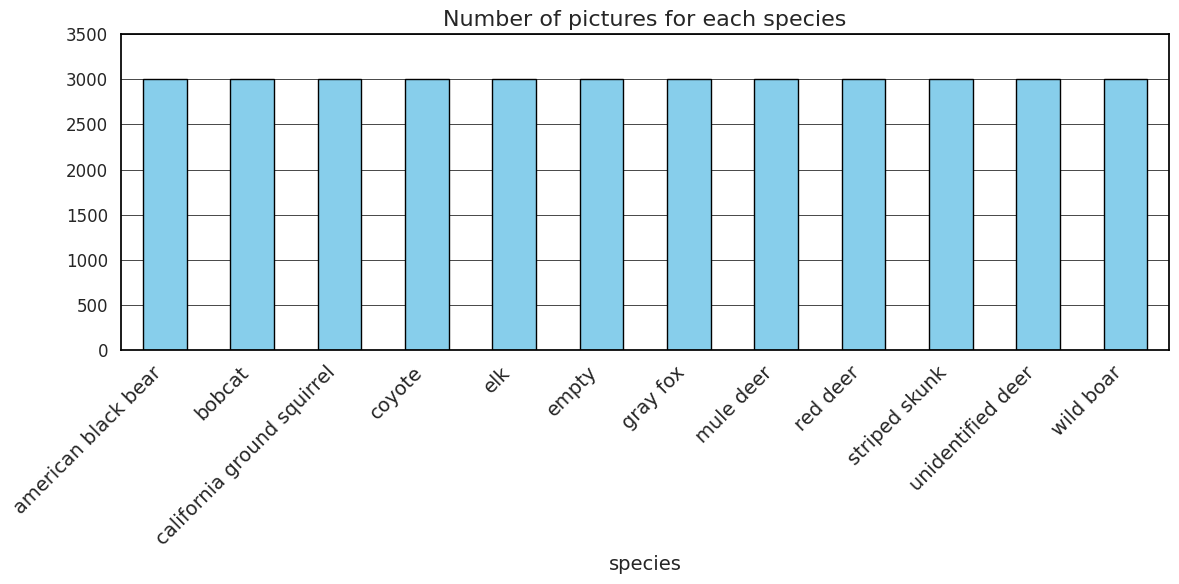

<Figure size 640x480 with 0 Axes>

In [25]:
df_limited = pd.read_csv('/exchange/dspro01/group3/data/filtered_metadata_limited.csv', sep=',', low_memory=False)

# Häufigkeiten der Arten zählen
species_counts = df_limited['common_name'].value_counts()

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))  # Breite 12, Höhe 6
species_counts.plot(kind='bar', color='skyblue', ax=ax, edgecolor='black')

# Hintergrund entfernen
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Achsenlinien auf schwarz setzen
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Gridlines (Rasterlinien) auf schwarz setzen
ax.grid(True, color='black', linestyle='-', linewidth=0.5, axis='y')

# Y-Achse mit Mindestwert und zusätzlichem Platz
max_value = 3500 #species_counts.max()
ax.set_ylim(0, max_value) 

# Plot anpassen
plt.title('Number of pictures for each species', fontsize=16)
plt.xlabel('species', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Dynamische Y-Ticks
y_ticks = np.linspace(0, max_value, 8)  
plt.yticks(y_ticks, [int(y) for y in y_ticks], fontsize=12)

plt.tight_layout()

# Plot anzeigen
plt.show()

plt.savefig('plot_full-dataset.svg', dpi=600, bbox_inches='tight', transparent=True)
